# Term Paper : Effect of Cocoa Exports on Exchange Rates


### Project Statement

What factors contribute to Ghana's rapid currency depreciation? While exchange rate volatility, specifically depreciation, has been anecdotally connected with macroeconomic instability, little effort has been made to examine the elements that contribute to it. Additionally, debates over Ghana's currency rate fluctuations are mostly centered on public economic discourses with little empirical or theoretical merit.

The relationship between the exchange rate and agricultural exports, particularly cocoa exports, is examined in this study in order to gain a better understanding of the key causes of exchange rate volatility and the channels through which they manifest. Since currency deregulation in 1986, Ghana's economy has been hampered by repeated depreciation of the Cedi, necessitating currency redenomination in 2007.

The Ghana Cedi (GH), which first traded at 0.94 to the US Dollar (USD) following the 2007 redenomination, has since lost significant value and now trades at approximately GH6 to the USD. While the theoretical association between exports and imports and currency volatility has been established, empirical evidence indicates that the relationship is country-specific and skewed in favor of currency variation-induced trade shocks.

This study will employ Directed Acyclic Graphs (DAGs) to determine the causation between the exchange rate and Ghana's cocoa exports between year 2000 to 2020.

## Comment

Since you are dealing with inflation, you should include data for monetary policy such as 1) quantity of money in circulation, 2) interest rates, and 3) central bank deposit accounts (if any exist in Ghana). Further, is there a relationship between monetary policy and fiscal policy in Ghana. Usually significant inflations are the result of governments using monetary policy as a source of seigniorage. This will likely require more rigor for your causal model. See Miljkovic, Malbec, and Zhang 2016.

##### Sources of data
https://www.intracen.org/itc/market-info-tools/trade-statistics/

https://databank.worldbank.org/source/world-development-indicators

http://www.fao.org/faostat/en/#data/TCL

### Project Proposal
(1000 words; at least 2 data sources; at least 2 different types of data visualizations )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import pingouin
data = pd.read_excel("Term Paper Data.xlsx")
data_df = pd.DataFrame(data)
data_df

,Year,HDI,Export Value (2010 U$D),GDP (2010 U$D),$ Exchange Rate,Cocoa Exports (2010 U$D),Interest Rates
0,1990,0.465,9.939685e+08,1.205614e+10,0.032616,393781000,26.60
1,1991,0.470,1.119008e+09,1.269293e+10,0.036763,350140000,31.80
2,1992,0.474,1.104856e+09,1.318534e+10,0.043685,298630000,22.60
3,1993,0.478,1.208401e+09,1.382483e+10,0.064871,280390000,34.20
4,1994,0.480,1.375222e+09,1.428105e+10,0.095568,321040000,34.20
5,1995,0.483,1.583729e+09,1.486834e+10,0.119914,355660000,41.00
6,1996,0.484,2.226975e+09,1.555265e+10,0.163547,711263000,45.00
7,1997,0.486,2.233493e+09,1.620530e+10,0.204796,457069000,45.00
8,1998,0.487,2.533905e+09,1.696701e+10,0.231166,516988000,43.20
9,1999,0.489,2.476241e+09,1.771356e+10,0.266643,460565000,28.30


#### Research problem

In Ghana, the Financial Sector Adjustment Programme (FINSAP), which was a component of the Economic Recovery Program (ERP), launched significant changes to the financial sector in the 1980s, including the abandoning of fixed exchange rates in favor of a free-floating regime[1]. This transition was made on the assumption, among other things, that flexible exchange rates would alleviate the boom-bust cycle and steer the country toward a growth path, with the growth-enhancing effect of exchange rate pass-through on consumer prices, terms of trade, trade volumes, and investment.

As Ghana adopted a free exchange rate regime in the 1980s, the Ghana Cedi has depreciated against major currencies, most notably the US Dollar (US$), albeit not uniformly, since the Ghana Cedi saw some stability between 2002 and 2007[1]. Ghana's currency was redenominated on July 1, 2007, and one dollar was swapped for 93 pesewas. As a result of this action, the Cedi depreciated, and by the end of July 2009, the US dollar was worth GH1.49. Recently, the Cedi has been exceedingly volatile, dropping to 6.0 Ghana Cedis in 2021. This has been a source of concern for some time, as it has been asserted that it adds to the increase in consumer price inflation. As can be seen from the graph, the period following 2007 saw a dramatic increase in comparison to the preceding period.

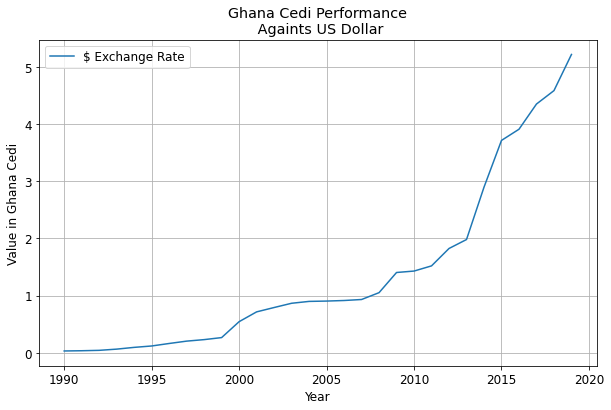

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":12})
fig, ax = plt.subplots(figsize = (10, 6))
data_df.plot.line(x = "Year", y = "$ Exchange Rate", ax = ax, legend = True)
plt.title("Ghana Cedi Performance\n Againts US Dollar")
plt.grid()
plt.xlabel("Year")
plt.ylabel("Value in Ghana Cedi")
plt.show()

The debates over the exchange rate and exports have centered on the effect of currency depreciation on exports; in this situation, there is an incentive to export because the exporter obtains a higher proportion of its local currency for the same exports[2,3,4]. Additionally, a stronger currency is thought to make exports from that nation more expensive, resulting in a decrease in exports, as Schuh argues in his seminal study on the Exchange Rate and US Agriculture [2]. According to some research conducted in Ghana, a considerable positive relationship exists between current cocoa export prices and production, and increases in cocoa export prices as a result of exchange rates encourage farmers to boost production[5].

Cocoa is the bedrock of Ghana's formal economy, accounting for a significant share of the country's total export profits and revenue[6]. Cocoa was initially exported around the turn of the twentieth century, and Ghana was the world's largest exporter from 1911 and 1976, accounting for 30-40% of global production. Ghana is currently the world's second largest producer of cocoa beans, after Ivory Coast, accounting for around 20% of global output. Around 80% of the country's cocoa is shipped raw, with the remaining 20% processed (cocoa butter, cocoa paste, and cocoa shells). Ghana's cocoa is primarily exported to the United States, the European Union, and Asia (raw and processed). As is the case in the majority of cocoa-producing countries, Ghanaian cocoa is grown by smallholder farmers. Cocoa export sales have steadily declined from 67 percent in 1986 to around 19.1 percent in 2020, with a $2.3 billion value.

<ipython-input-3-804b7c5955df>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])


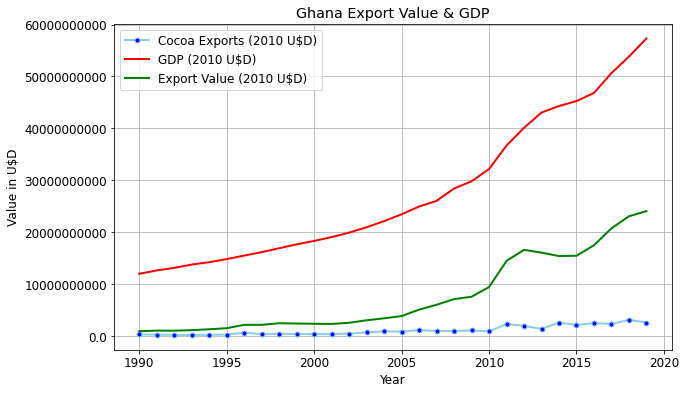

In [3]:
plt.rcParams.update({"font.size":12})
fig, ax = plt.subplots(figsize = (10, 6))
plt.title("Ghana Export Value & GDP")
plt.plot("Year", "Cocoa Exports (2010 U$D)", data=data_df, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=2)
plt.plot("Year", "GDP (2010 U$D)", data=data_df, marker='', color='red', linewidth=2)
plt.plot("Year", "Export Value (2010 U$D)" , data=data_df, marker='', color='green', linewidth=2)
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])
plt.legend()
plt.xlabel("Year")
plt.ylabel("Value in U$D")
plt.grid()
plt.show()

First it will be import to establish whether exchange rate causes agricultural exports or vice versa in Ghana. This will lay a solid foundation to determine the actual relationship between the exchange rate and agricultural exports. 

#### Research Objective
This study is going to determine the nature of relationship between exchange rate and agricultural exports specifically cocoa from Ghana between 2000 to 2020. 

#### Literature Review

There are two schools of thought in economics on what causes currency crises. Currency instability is associated with structural imbalances and insufficient measures in the first case, but arbitrary changes in market expectations are the principal source of instability in the second case[11]. One approach to exchange rate instability, referred to as first-generation or exogenous-policy models, views currency crises as an unavoidable outcome of unsustainable policy positions or structural imbalances. This perspective underlines that the exchange rate regime is a component of a larger policy package and can be maintained only if it does not conflict with other monetary and fiscal objectives. According to the first-generation approach, a country's ability to fund its current account deficits in the future through sufficient export earnings is also a critical factor affecting an exchange rate regime's viability[12]. This lays the groundwork for investigating the empirical link between export revenues and the exchange rate.

While the literature on trade and exchange rates has been skewed in favor of the exchange rate's effect on exports as a disincentive to export[2,3,4], relatively little empirical research has been conducted on the effect of exports on foreign exchange. An Indian study that examined the causal linkages between agricultural export volume and real exchange rates using annual time series data from 1980 to 2010 discovered no significant relationship between agricultural export and exchange rates. This association was determined using Granger-causality analysis[7]. The use of annual data, on the other hand, will miss out on details about intra-year fluctuations that can provide useful information about causal relationships for commodities which are seasonal and traded mainly at a particular period.

According to a Ghanaian study on the determinants of currency rate volatility, approximately three-quarters of real exchange rate shocks are self-induced, with the remaining one-quarter or so owing to factors such as government expenditure and money supply expansion, terms of trade, and output shocks[13]. Another study, which employed backward elimination and stepwise regression to ascertain the key variables influencing Ghana's frequent exchange rate depreciation between 1980 and 2015, discovered that agricultural output, industrial output, services output, and exports all had a significant effect on the Ghana Cedi's exchange rate against the dollar[14].

Trade openness is a word used in studies of the determinants of currency rates that aim to incorporate exports into their models[8,9]. Trade openness is a convenient variable that is frequently used in a variety of international macroeconomic studies. It is defined as the ratio of exports plus imports to GDP and has been used in cross-country studies on a variety of topics, including real exchange rate dynamics[10]. This, however, does not capture the unique effect of exports.

The purpose of this study is to establish a relationship between exports and exchange rates in Ghana using quarterly data on cocoa exports.

#### Data

Quaterly data on cocoa exports from Ghana between 2000 to 2020 will be obtained from the International Trade Center's trade statistics. Quaterly cedi exchange rate with the dollar which is the major trading currency between 2000 to 2020 will also be obtained from data from the World Bank's development indictors. Other indicators such as GDP per capita will be obtained from the same source

#### Method

Granger Causality test to determine the direction of causality between exchange rate and agricultural exports
DAGs to confirm the results from the granger test.

In [4]:
data['Ln GDP'] = np.log(data['GDP (2010 U$D)']) 
data['Ln Cocoa Exports'] = np.log(data['Cocoa Exports (2010 U$D)']) 
data['Ln Export Value'] = np.log(data['Export Value (2010 U$D)']) 
data['lag Interest Rates'] = data['Interest Rates'].shift(1)

In [22]:
data

,Year,HDI,Export Value (2010 U$D),GDP (2010 U$D),$ Exchange Rate,Cocoa Exports (2010 U$D),Interest Rates,Ln GDP,Ln Cocoa Exports,Ln Export Value,lag Interest Rates
0,1990,0.465,9.939685e+08,1.205614e+10,0.032616,393781000,26.60,23.212840,19.791305,20.717216,NaN
1,1991,0.470,1.119008e+09,1.269293e+10,0.036763,350140000,31.80,23.264311,19.673844,20.835709,26.60
2,1992,0.474,1.104856e+09,1.318534e+10,0.043685,298630000,22.60,23.302371,19.514716,20.822981,31.80
3,1993,0.478,1.208401e+09,1.382483e+10,0.064871,280390000,34.20,23.349732,19.451692,20.912564,22.60
4,1994,0.480,1.375222e+09,1.428105e+10,0.095568,321040000,34.20,23.382199,19.587076,21.041881,34.20
5,1995,0.483,1.583729e+09,1.486834e+10,0.119914,355660000,41.00,23.422500,19.689486,21.183048,34.20
6,1996,0.484,2.226975e+09,1.555265e+10,0.163547,711263000,45.00,23.467497,20.382553,21.523910,41.00
7,1997,0.486,2.233493e+09,1.620530e+10,0.204796,457069000,45.00,23.508604,19.940345,21.526833,45.00
8,1998,0.487,2.533905e+09,1.696701e+10,0.231166,516988000,43.20,23.554537,20.063530,21.653028,45.00
9,1999,0.489,2.476241e+09,1.771356e+10,0.266643,460565000,28.30,23.597596,19.947965,21.630007,43.20


In [5]:
keys =[#'HDI',
        #'Export Value (2010 U$D)',
        "Ln GDP",
        #"Ln Export Value",
        "Ln Cocoa Exports",
        #'GDP (2010 U$D)',
        '$ Exchange Rate',
        #'Cocoa Exports (2010 U$D)',
        'Interest Rates',
        #'lag Interest Rates'
]
keys = keys 
data_reg = data[keys].dropna()

In [6]:
import statsmodels.api as sm

residuals = {}
for y_var in data_reg.keys():
    X_vars = list(data_reg.keys())
    X_vars.remove(y_var)
    X = data_reg[X_vars]
    X["Constant"] = 1
    y = data_reg[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

In [7]:
data_reg.corr().round(2)

,Ln GDP,Ln Cocoa Exports,$ Exchange Rate,Interest Rates
Ln GDP,1.00,0.96,0.91,-0.65
Ln Cocoa Exports,0.96,1.00,0.87,-0.63
$ Exchange Rate,0.91,0.87,1.00,-0.46
Interest Rates,-0.65,-0.63,-0.46,1.00


In [8]:
data_reg.pcorr().round(2)

,Ln GDP,Ln Cocoa Exports,$ Exchange Rate,Interest Rates
Ln GDP,1.00,0.75,0.65,-0.42
Ln Cocoa Exports,0.75,1.00,-0.07,0.01
$ Exchange Rate,0.65,-0.07,1.00,0.42
Interest Rates,-0.42,0.01,0.42,1.00


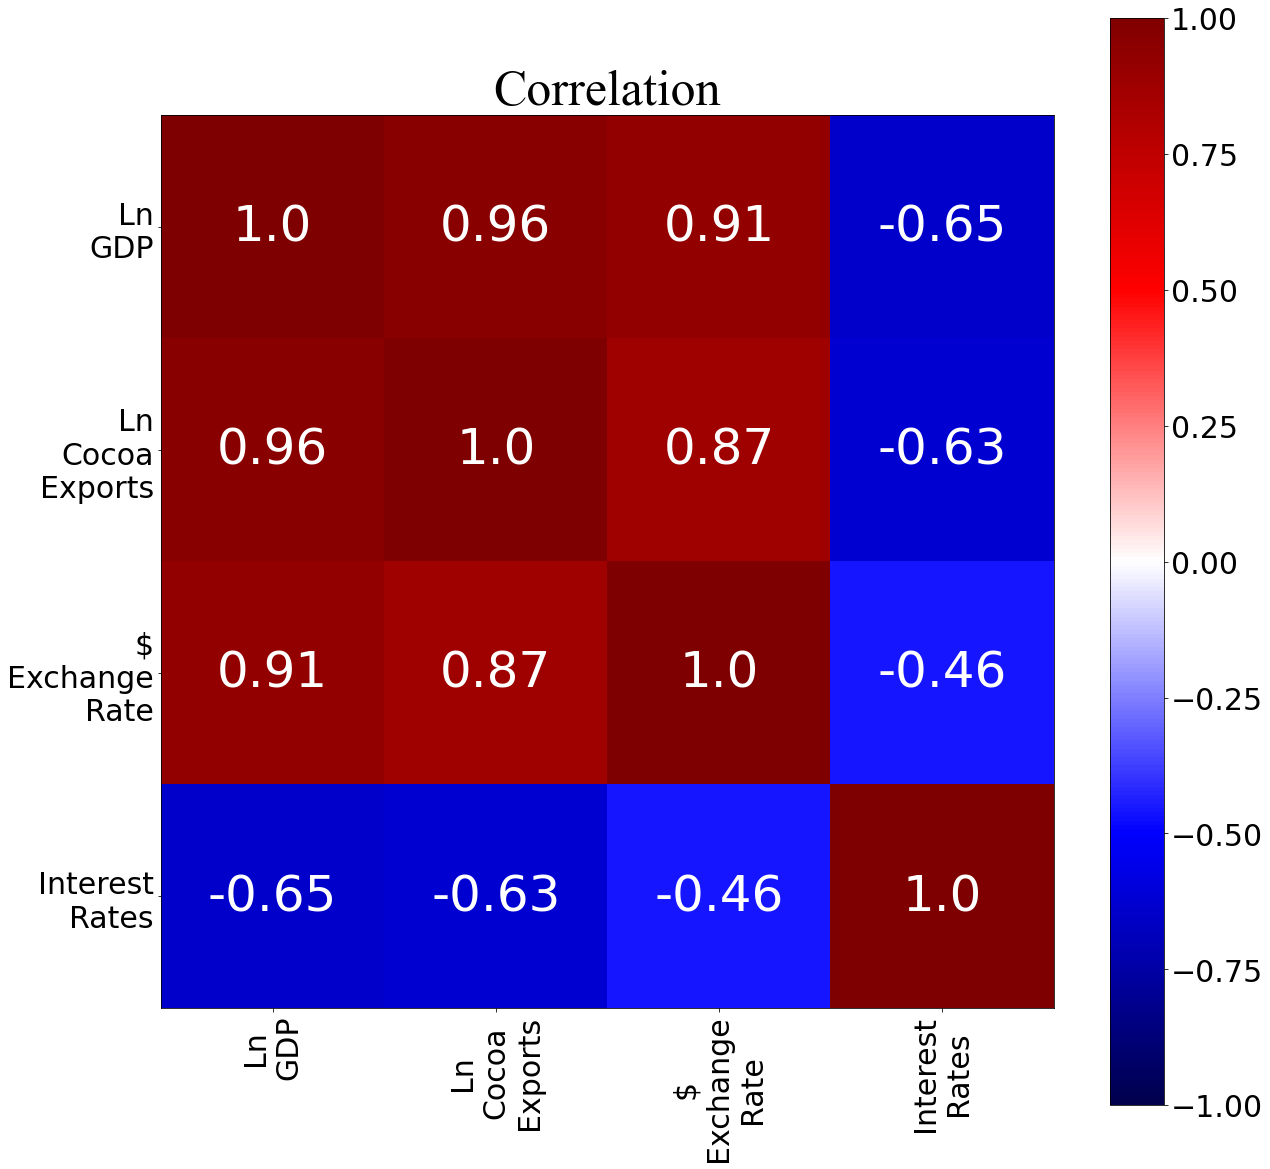

In [9]:
from datlib.plots import *
corr_matrix_heatmap(data_reg.corr(), 
                    save_fig = False, 
                    pp = None,)

In [10]:
pcorr_pvalues = {}

for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            pcorr_pvalues[y][x] = sm.OLS(Y,X).fit().pvalues[x]
        else:
            pcorr_pvalues[y][x] = np.NaN
pd.DataFrame(pcorr_pvalues).round(2)

,Ln GDP,Ln Cocoa Exports,$ Exchange Rate,Interest Rates
Ln GDP,NaN,0.00,0.00,0.02
Ln Cocoa Exports,0.00,NaN,0.70,0.96
$ Exchange Rate,0.00,0.70,NaN,0.02
Interest Rates,0.02,0.96,0.02,NaN


In [11]:
import pingouin
from pgmpy.estimators import PC
c = PC(data_reg[keys].dropna())
max_cond_vars = len(keys) - 2

sig =0.05
model = c.estimate(return_type = "dag", variant= "parallel", 
                   significance_level = sig, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()
pcorr = data_reg.pcorr()
weights = {}

  0%|          | 0/2 [00:00<?, ?it/s]

In [12]:
undirected_graph = {key:[] for key in data_reg.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in data_reg.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

undirected_graph

{'Ln GDP': ['Ln Cocoa Exports', '$ Exchange Rate', 'Interest Rates'],
 'Ln Cocoa Exports': ['Ln GDP', '$ Exchange Rate', 'Interest Rates'],
 '$ Exchange Rate': ['Ln GDP', 'Ln Cocoa Exports', 'Interest Rates'],
 'Interest Rates': ['Ln GDP', 'Ln Cocoa Exports', '$ Exchange Rate']}

OutEdgeView([('$ Exchange Rate', 'Ln Cocoa Exports'), ('Ln GDP', 'Ln Cocoa Exports'), ('Ln GDP', '$ Exchange Rate'), ('Ln GDP', 'Interest Rates')])

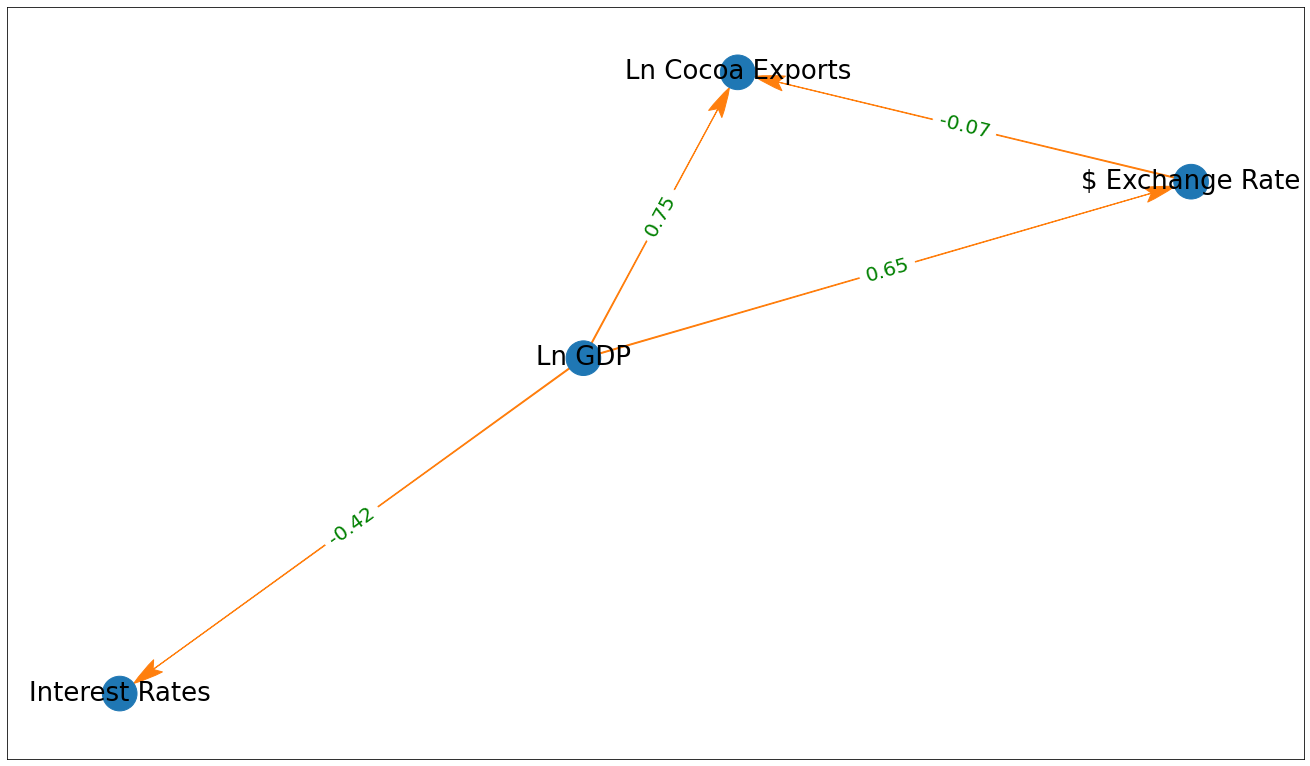

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
import networkx as nx
def graph_DAG(edges, data_reg, title = ""):
    pcorr = data_reg.pcorr()
    graph = nx.DiGraph()
    edge_labels = {}
    for edge in edges:
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
        
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     font_color = "black",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)
plt.close()
graph_DAG(edges, data_reg)
edges

In [14]:
import statsmodels.api as sm
import numpy
residuals = {}
partial_corr = {}
reg_df = data_reg.dropna()[:-1]
for y_var in data_reg:
    X_vars = [x for x in data_reg if x != y_var]
    X= reg_df[X_vars]
    X["constant"] = 1
    y = reg_df[y_var]
    model = sm.OLS(y,X)
    results = model.fit()
    print(results.summary())
    predict = results.predict()
    reg_df["predict"] = predict
    residuals[y_var] = results.resid
r2 = {}
for x in data_reg:
    partial_corr[x] = {}
    r2[x] = {}
    for y in data_reg:
        if x != y:
            Y = pd.DataFrame(residuals[y])
            X = pd.DataFrame(residuals[x])
            model = sm.OLS(Y,X)
            results = model.fit()
            print(results.rsquared, results.pvalues)
            partial_corr[x][y] = np.corrcoef(residuals[x], residuals[y])[0][1] * -1
            print(partial_corr[x][y])
           # print(pcs_dct[x][y])
        
reg_df.pcorr().sort_index(axis=0, ascending=True).sort_index(axis=1, ascending = True)
pd.DataFrame(residuals).corr()

                            OLS Regression Results                            
Dep. Variable:                 Ln GDP   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     168.5
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.05e-16
Time:                        19:33:43   Log-Likelihood:                 25.577
No. Observations:                  29   AIC:                            -43.15
Df Residuals:                      25   BIC:                            -37.68
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Ln Cocoa Exports     0.3383      0.065  

<ipython-input-14-4769381238a7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["constant"] = 1
<ipython-input-14-4769381238a7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["constant"] = 1
<ipython-input-14-4769381238a7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,Ln GDP,Ln Cocoa Exports,$ Exchange Rate,Interest Rates
Ln GDP,1.000000,-0.720737,-0.626179,0.429658
Ln Cocoa Exports,-0.720737,1.000000,-0.010385,0.017067
$ Exchange Rate,-0.626179,-0.010385,1.000000,-0.445560
Interest Rates,0.429658,0.017067,-0.445560,1.000000


#### References

1. Alagidede, Paul, and Muazu Ibrahim. "On the causes and effects of exchange rate volatility on economic growth: Evidence from Ghana." Journal of African Business 18, no. 2 (2017): 169-193.

2. Schuh, G. Edward. "The exchange rate and US agriculture." American Journal of Agricultural Economics 56, no. 1 (1974): 1-13.
3. Batten, Dallas S., and Michael T. Belongia. “Monetary Policy, Real Exchange Rates, and U.S. Agricultural Exports.” American Journal of Agricultural Economics 68, no. 2 (1986): 422–27. https://doi.org/10.2307/1241457.
4. Berman, Nicolas, Philippe Martin, and Thierry Mayer. "How do different exporters react to exchange rate changes?." The Quarterly Journal of Economics 127, no. 1 (2012): 437-492.
5. Boansi, David (2013). Competitiveness and Determinants of Cocoa Exports from Ghana. International Journal of Agricultural Policy and Research, 1(9): p. 236-254.
6. USDA. (2012). Global Agricultural Information Network (GAIN) Report. Accra.
ComtradeUnitedNations file:///C:/Users/user/Desktop/Active%20folder/Product%20Profile.html
7. Mousavi, Saeid, and D. S. Leelavathi. "Agricultural export and exchange rates in India: the granger causality approach." International Journal of Scientific and Research Publications 3, no. 2 (2013): 1-8.
8. Caporale, Guglielmo Maria, Thouraya Hadj Amor, and Christophe Rault. "Sources of real exchange rate volatility and international financial integration: A dynamic generalised method of moments panel approach." Journal of International Development 26, no. 6 (2014): 810-820.
9. Stanc¨k, J. (2007). Determinants of exchange rate volatility: The case of the new EU members, The Czech Journal of Economics and Finance, 57 (9-10): 414ñ432.
10. Goldfajn, I. and Valdéz, R. O. (1999). ‘ The aftermath of appreciations’, Quarterly Journal of Economics, Vol. 114, pp. 229– 262.
11. Pesenti, Paolo A., and Cédric Tille. "The economics of currency crises and contagion: An introduction." Economic Policy Review 6, no. 3 (2000).
12. Krugman, Paul. "A model of balance-of-payments crises." Journal of money, credit and banking 11, no. 3 (1979): 311-325.
13. Alagidede, Paul, and Muazu Ibrahim. "On the causes and effects of exchange rate volatility on economic growth: Evidence from Ghana." Journal of African Business 18, no. 2 (2017): 169-193.
14. Enu, Patrick. "The key drivers of the exchange rate depreciation in Ghana." Journal of Basic and Applied Research International 22, no. 4 (2017): 132-147.	